#  LR symmetric standar model with fermion triplets

Sample of notebook for specific model

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *


## Check one point

In [3]:
a=hep(MODEL='LRmodelstripletLRDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [4]:
v=a.vev
#lambda_1=0.13
M11=10000.
M23=1000.
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][12]='%0.8E       # M11' %M11
a.LHA.blocks['MINPAR'][13]='%0.8E       # M23' %M23
a.LHA.blocks['MINPAR'][14]='%0.8E       # lambda1' %0.1
a.LHA.blocks['MINPAR'][15]='%0.8E       # lambda2' %0.1
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI

Omega h^2, SI proton, neutron = 0.00225 0.0 0.0


## Scan $m_{DM}$

In [9]:
df=pd.DataFrame()
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
M11=10000.
lam1=0.1
lam2=0.1
dm_masses=np.logspace(np.log10(1000),np.log10(10000),100)
for MDM in dm_masses:
    if np.where(dm_masses==MDM)[0][0]%10==0: #find the index of the array entry
        print np.where(dm_masses==MDM)[0][0]
    a.LHA.blocks['MINPAR'][12]='%0.8E       #M11' %MDM  # -> Fill a.Series.MDF
    devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
    a.LHA.blocks['MINPAR'][12]='%0.8E       # M11' %M11
    a.LHA.blocks['MINPAR'][13]='%0.8E       # M23' %MDM
    a.LHA.blocks['MINPAR'][14]='%0.8E       # lambda1' %lam1
    a.LHA.blocks['MINPAR'][15]='%0.8E       # lambda2' %lam2
    a.runmicromegas(Direct_Detection=True)
    df=df.append(a.Series,ignore_index=True)

0
10
20
30
40
50
60
70
80
90


### Relic density

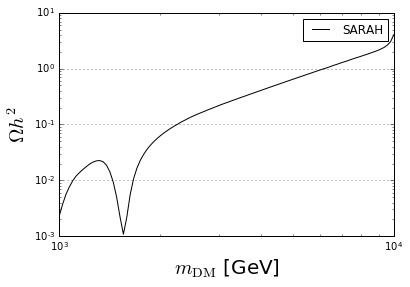

In [14]:
plt.loglog(df.M23,df.Omega_h2,'k-',label='SARAH')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()
plt.legend(loc='best')
plt.savefig('omega.pdf')

In [13]:
print np.abs(df.neutron_SI.max())

0.0


In [ ]:
plt.semilogy(df.M11,df.neutron_SI,'k-',label='SARAH')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.legend(loc='best')
plt.savefig('dd.pdf')

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)